In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#### TODO install geopandas
#import geopandas as gp
from sklearn.preprocessing import normalize, MinMaxScaler
from scipy.sparse import coo_matrix, csr_matrix

Read in standardized csv files and merge them into one Dataframe

In [140]:
df_form = pd.read_csv("formationout.csv")
df_well = pd.read_csv("out.csv")
#Merge the 2 CSVs by API number
df_merged = df_well.merge(df_form, how = "left", on = "API Number")
#drop well number identifier since we are using API number
df_merged.drop(columns="Well Number", inplace = True)
print(df_merged.head())

     API Number  Northing   Easting  True Vertical Depth  Normalized TVD  \
0  490251039700  974652.3  794810.9              -2007.0        0.451998   
1  490251039700  974652.3  794810.9              -2007.0        0.451998   
2  490251039700  974652.3  794810.9              -2007.0        0.451998   
3  490251039700  974652.3  794810.9              -2007.0        0.451998   
4  490251039700  974652.3  794810.9              -2007.0        0.451998   

   Form Alias   Top MD  
0        22.0  1564.04  
1        19.0   910.29  
2        10.0  2785.42  
3        20.0  1461.42  
4        23.0   527.25  


Taking a sample of the Dataframe to holdout 

In [141]:
df_holdout = df_merged.sample(frac=0.2, random_state=4242001)
print(df_holdout.head())
#make list of API numbers that we held out
heldout_APIs = []
for i in df_holdout["API Number"]:
    heldout_APIs.append(i)
print(len(heldout_APIs))
#now we need to go back to our original Dataframe and set the vals we are holding out to 0
df_merged_heldout = df_merged.copy()
np.random.seed(4242001)
#the random form aliases we are holding out
h = np.random.randint(0, 59, 5)
#
#hold out these tops, but keep rest of data intact
#
#query by heldout APIs and find subset dataframe
df_merged_heldout[df_merged_heldout["API Number"].isin(heldout_APIs)]["Form Alias"].replace(h, float("NaN"), inplace=True)
#ser = subset["Form Alias"]
#set random form alias h to NaN
#ser.replace(h, float("NaN"))

        API Number  Northing   Easting  True Vertical Depth  Normalized TVD  \
2933  490251070700  961733.9  802774.0              -4401.0        0.095110   
2439  490251059500  965073.6  794723.3              -2121.5        0.434928   
3298  490251078100  967006.2  796184.8              -1015.0        0.599881   
542   490250952100  974478.6  792059.1              -2268.0        0.413089   
5466  490251118100  973327.5  794161.2              -2076.6        0.441622   

      Form Alias   Top MD  
2933         2.0    54.74  
2439        18.0  2783.22  
3298         0.0   229.35  
542          9.0  2293.08  
5466         8.0  2369.47  
1394


C:\Users\joshd\Anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [142]:
len(df_holdout["API Number"].unique())
df_holdout.sort_values(by=["API Number", "Form Alias"])

,API Number,Northing,Easting,True Vertical Depth,Normalized TVD,Form Alias,Top MD
16,490250632200,950778.6,808258.9,-2195.00,0.423971,NaN,NaN
17,490250632500,951369.6,806496.9,-4430.00,0.090787,1.0,295.64
23,490250632700,951489.5,807735.2,-4195.00,0.125820,3.0,963.16
29,490250632800,952038.5,807051.6,-4298.00,0.110465,2.0,356.96
27,490250632800,952038.5,807051.6,-4298.00,0.110465,3.0,845.31
37,490250633200,952745.0,808947.2,-3949.00,0.162493,1.0,784.37
39,490250633200,952745.0,808947.2,-3949.00,0.162493,3.0,1245.16
55,490250633800,953598.2,802788.0,1669.00,1.000000,11.0,2928.00
51,490250633800,953598.2,802788.0,1669.00,1.000000,57.0,6848.08
63,490250633900,953395.6,808280.8,-4018.00,0.152206,2.0,593.88


Make a sparse matrix from the Dataframe heldout

In [143]:
D_df = df_merged_heldout.pivot_table("Top MD","Form Alias","API Number").fillna(0)

Trying different ways of normalizing R, demeaning and normalizing with SKLearn

In [144]:
mms = MinMaxScaler()
R = D_df.values
target_vals = df_holdout["Top MD"]
well_depth_mean = np.mean(R, axis = 1)
R_normalize = mms.fit_transform(R, target_vals)
R_demeaned = R - well_depth_mean.reshape(-1, 1)

Create binarized matrix with values of 1 where there are depth values in the sparse matrix R and values of 0 where there are not depth values in the sparse matrix R.

In [145]:
from sklearn.preprocessing import binarize
A = binarize(R)

This is the code that runs Alternating Least Squares factorization

In [146]:
#ALS factorization from 
# https://github.com/mickeykedia/Matrix-Factorization-ALS/blob/master/ALS%20Python%20Implementation.py
# here items are the formation and users are the well
def runALS(A, R, n_factors, n_iterations, lambda_):
    """
    Runs Alternating Least Squares algorithm in order to calculate matrix.
    :param A: User-Item Matrix with ratings
    :param R: User-Item Matrix with 1 if there is a rating or 0 if not
    :param n_factors: How many factors each of user and item matrix will consider
    :param n_iterations: How many times to run algorithm
    :param lambda_: Regularization parameter
    :return:
    """
    print("Initiating ")
    lambda_ = lambda_
    n_factors = n_factors
    n, m = A.shape
    n_iterations = n_iterations
    Users = 5 * np.random.rand(n, n_factors)
    Items = 5 * np.random.rand(n_factors, m)

    def get_error(A, Users, Items, R):
        # This calculates the MSE of nonzero elements
        return np.sum((R * (A - np.dot(Users, Items))) ** 2) / np.sum(R)

    MSE_List = []

    print("Starting Iterations")
    for iter in range(n_iterations):
        for i, Ri in enumerate(R):
            Users[i] = np.linalg.solve(
                np.dot(Items, np.dot(np.diag(Ri), Items.T))
                + lambda_ * np.eye(n_factors),
                np.dot(Items, np.dot(np.diag(Ri), A[i].T)),
                ).T
        print(
            "Error after solving for User Matrix:",
            get_error(A, Users, Items, R),
            )

        for j, Rj in enumerate(R.T):
            Items[:, j] = np.linalg.solve(
                np.dot(Users.T, np.dot(np.diag(Rj), Users))
                + lambda_ * np.eye(n_factors),
                np.dot(Users.T, np.dot(np.diag(Rj), A[:, j])),
                )
        print(
            "Error after solving for Item Matrix:",
             get_error(A, Users, Items, R),
            )

        MSE_List.append(get_error(A, Users, Items, R))
        print("%sth iteration is complete..." % iter)
    return Users, Items, MAE
    
    # fig = plt.figure()
    # ax = fig.add_subplot(111)
    # plt.plot(range(1, len(MSE_List) + 1), MSE_List); plt.ylabel('Error'); plt.xlabel('Iteration')
    # plt.title('Python Implementation MSE by Iteration \n with %d formations and %d wells' % A.shape);
    # plt.savefig('Python MSE Graph.pdf', format='pdf')
    # plt.show()

In [147]:
U, Vt, MAE_list = runALS(R_normalize, A, 20, 20, 0.1)

Initiating 
Starting Iterations
Error after solving for User Matrix: 0.059244088879520415
Error after solving for Item Matrix: 0.29444432814713467
0th iteration is complete...
Error after solving for User Matrix: 0.0045542557536945244
Error after solving for Item Matrix: 0.005463033869761052
1th iteration is complete...
Error after solving for User Matrix: 0.00019747927057722322
Error after solving for Item Matrix: 0.002520561226555035
2th iteration is complete...
Error after solving for User Matrix: 0.00011718169656910825
Error after solving for Item Matrix: 0.0013194293732707249
3th iteration is complete...
Error after solving for User Matrix: 7.922532055659828e-05
Error after solving for Item Matrix: 0.0008947042710166904
4th iteration is complete...
Error after solving for User Matrix: 6.176581663895277e-05
Error after solving for Item Matrix: 0.0006650072330650348
5th iteration is complete...
Error after solving for User Matrix: 5.4533102382083735e-05
Error after solving for Item 

Below finds the index of the minimum of the maximum error after each set of iterations. This is the optimal value for the parameter n_factors.

In [148]:
#MAE_max = []
#get a list of the max errors from each value of n_factor
#for i in MAE_list:
    #MAE_max.append(max(i))
#The index of the minimum max error is the optimal n_factor value
#print(MAE_max.index(min(MAE_max)))

In [149]:
recommendations = np.dot(U, Vt)
recsys_df = pd.DataFrame(data = recommendations[0:, 0:], index = D_df.index,
                        columns = D_df.columns)
recsys_df.head()

API Number,490250632500,490250632700,490250632800,490250632900,490250633200,490250633400,490250633800,490250633900,490250634000,490250634100,...,490252284701,490252303100,490252304000,490252304700,490252304800,490252305400,490252305500,490252319500,490252345102,490252347904
Form Alias,,,,,,,,,,,,,,,,,,,,,
0.0,0.877744,0.905847,0.825817,0.865094,0.880295,0.848912,-0.160609,0.861570,0.887244,0.845754,...,0.084061,0.065922,0.050878,0.096350,0.027106,0.063142,0.874696,0.040456,0.083468,-0.245044
1.0,0.390148,0.516984,0.433028,0.537842,0.589520,0.490978,0.131286,0.544511,0.430925,0.472257,...,0.132873,0.116933,0.114973,0.035674,0.148763,0.117077,0.520081,0.113991,0.029653,-0.173819
2.0,0.327275,0.462874,0.378833,0.489078,0.543761,0.439667,0.162269,0.496640,0.370867,0.419624,...,0.138357,0.116036,0.115032,0.027511,0.155430,0.116300,0.469227,0.110889,0.023303,-0.161684
3.0,1.001101,1.000907,0.922712,0.941205,0.949736,0.934329,-0.203424,0.939975,1.001040,0.933260,...,0.098823,0.078790,0.064322,0.113629,0.008286,0.078358,0.941146,0.054517,0.113383,-0.272133
4.0,0.166096,0.141826,0.978898,0.978526,0.978315,0.978700,-0.011962,0.978460,0.158326,0.978793,...,0.104626,0.093031,0.078248,0.217390,0.160607,0.091566,0.978685,0.068073,0.156015,0.422838


In [150]:
stacked = recsys_df.T.reset_index().stack(level=0)
stacked.index
#look at dropping multi level index

MultiIndex(levels=[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 

Plot the recommended depths for all formations for the first 5 wells vs the actual depths

6.628754732421417
9.737884357099752
33.48656977160181
34.085631598041395
38.02852856189048


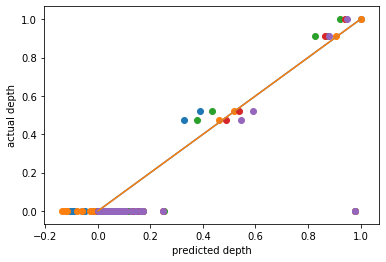

In [160]:
D_df_normalized = mms.fit_transform(D_df.iloc[0:, 1].values.reshape(-1,1))
for i in range(5):
    plt.scatter(recsys_df.iloc[0:, i].values, D_df_normalized) #plot predicted vs actual
    plt.xlabel('predicted depth')
    plt.ylabel('actual depth')
    plt.plot(np.arange(0,recsys_df.iloc[0:,i].max()))
    #denormalized and printed error for manuscript
    print(median_absolute_error(mms.inverse_transform(recsys_df.iloc[0:, i].values.reshape(-1,1)), D_df.iloc[0:, 1].values))

Tough part, check predictions against known and use MAE error metric

In [152]:
#print(recsys_df)
recsys_df_toJoin = recsys_df.T.reset_index()
print(recsys_df_toJoin)

Form Alias    API Number       0.0       1.0       2.0       3.0       4.0  \
0           490250632500  0.877744  0.390148  0.327275  1.001101  0.166096   
1           490250632700  0.905847  0.516984  0.462874  1.000907  0.141826   
2           490250632800  0.825817  0.433028  0.378833  0.922712  0.978898   
3           490250632900  0.865094  0.537842  0.489078  0.941205  0.978526   
4           490250633200  0.880295  0.589520  0.543761  0.949736  0.978315   
5           490250633400  0.848912  0.490978  0.439667  0.934329  0.978700   
6           490250633800 -0.160609  0.131286  0.162269 -0.203424 -0.011962   
7           490250633900  0.861570  0.544511  0.496640  0.939975  0.978460   
8           490250634000  0.887244  0.430925  0.370867  1.001040  0.158326   
9           490250634100  0.845754  0.472257  0.419624  0.933260  0.978793   
10          490250634300  0.859839  0.196588  0.118695  1.003329  0.208890   
11          490250634600  0.865760  0.327614  0.260297  1.001341

In [153]:
actual = df_merged[(df_merged["API Number"].isin(heldout_APIs)) & (df_merged["Form Alias"] == 0.0)]
predicted = recsys_df_toJoin[(recsys_df_toJoin["API Number"].isin(heldout_APIs))][0.0]
actual

,API Number,Northing,Easting,True Vertical Depth,Normalized TVD,Form Alias,Top MD
5,490251039700,974652.3,794810.9,-2007.0,0.451998,0.0,126.50
19,490250632500,951369.6,806496.9,-4430.0,0.090787,0.0,659.21
22,490250632700,951489.5,807735.2,-4195.0,0.125820,0.0,877.38
26,490250632800,952038.5,807051.6,-4298.0,0.110465,0.0,758.13
38,490250633200,952745.0,808947.2,-3949.0,0.162493,0.0,1153.97
59,490250633900,953395.6,808280.8,-4018.0,0.152206,0.0,995.26
66,490250634000,953294.8,807006.8,-4325.0,0.106440,0.0,736.08
70,490250634100,953347.9,807654.9,-4206.0,0.124180,0.0,864.05
76,490250634600,953957.3,806350.2,-4437.0,0.089744,0.0,609.55
82,490250634800,954021.0,807643.8,-4220.0,0.122093,0.0,840.60


In [154]:
from sklearn.metrics import median_absolute_error
MAE = []
for i in range(0, int( df_merged.iloc[0:, 5].max() + 1 )):
    act_list = []
    pred_list = []
    #loop through all formation aliases
    #get actual df form alias i
    actual = df_merged[df_merged["Form Alias"] == float(i)]
    #get predicted df form alias i
    predicted = pd.DataFrame(recsys_df_toJoin[float(i)])
    #add API Number column to new dataframe
    #predicted = predicted.assign(API=recsys_df_toJoin["API Number"])
    #query by API Number now
    #actual = actual[actual["API Number"].isin(heldout_APIs)]
    #predicted = predicted[predicted["API"].isin(heldout_APIs)]
    #MAE.append( median_absolute_error( actual["Top MD"], mms.inverse_transform(predicted[float(i)].values.reshape(1, -1)) ) )

In [155]:
recsys_df_toJoin.head()

Form Alias,API Number,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,...,50.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0
0,490250632500,0.877744,0.390148,0.327275,1.001101,0.166096,-0.003427,-0.018459,-0.016294,-0.062485,...,0.002138,0.002696,0.003191,0.003202,0.005184,0.005166,0.004897,0.002837,0.002431,0.002325
1,490250632700,0.905847,0.516984,0.462874,1.000907,0.141826,-0.009160,-0.029338,-0.026000,-0.079783,...,0.001853,0.003138,0.003542,0.003563,0.008280,0.008251,0.007821,0.010588,0.009071,0.008674
2,490250632800,0.825817,0.433028,0.378833,0.922712,0.978898,0.172065,0.166436,0.251026,0.115638,...,0.010967,0.010346,0.012061,0.012081,0.013725,0.013677,0.012965,0.016241,0.013915,0.013306
3,490250632900,0.865094,0.537842,0.489078,0.941205,0.978526,0.170762,0.161064,0.248094,0.104422,...,0.010957,0.010876,0.012579,0.012608,0.016333,0.016275,0.015428,0.022341,0.019141,0.018303
4,490250633200,0.880295,0.589520,0.543761,0.949736,0.978315,0.170109,0.158511,0.246814,0.099138,...,0.010939,0.011138,0.012826,0.012859,0.017691,0.017628,0.016710,0.025560,0.021899,0.020940


Predicted depths

In [156]:
recsys_df.iloc[0:, 1]

Form Alias
0.0     0.905847
1.0     0.516984
2.0     0.462874
3.0     1.000907
4.0     0.141826
5.0    -0.009160
6.0    -0.029338
7.0    -0.026000
8.0    -0.079783
9.0    -0.061528
10.0   -0.136243
11.0   -0.127054
12.0    0.006569
13.0   -0.010476
14.0   -0.010757
15.0    0.028353
16.0    0.016849
17.0    0.017042
18.0   -0.116761
19.0    0.034381
20.0    0.016062
21.0    0.031135
22.0    0.004420
23.0    0.037371
24.0    0.002516
25.0    0.012508
26.0   -0.010328
27.0   -0.005788
28.0    0.019518
29.0    0.019495
30.0    0.019420
31.0    0.019401
32.0    0.020107
33.0    0.020170
34.0    0.031023
35.0    0.000174
36.0    0.002988
37.0    0.009791
38.0    0.016376
39.0    0.009594
40.0    0.010976
41.0    0.008404
42.0    0.001568
43.0    0.010466
44.0    0.003233
45.0    0.004865
46.0    0.001875
47.0    0.002422
48.0    0.001833
49.0    0.001882
50.0    0.001853
51.0    0.003138
52.0    0.003542
53.0    0.003563
54.0    0.008280
55.0    0.008251
56.0    0.007821
57.0    0.010588
58.

Actual depths

In [157]:
D_df.iloc[0:, 1]

Form Alias
0.0     877.38
1.0     503.67
2.0     455.35
3.0     963.16
4.0       0.00
5.0       0.00
6.0       0.00
7.0       0.00
8.0       0.00
9.0       0.00
10.0      0.00
11.0      0.00
12.0      0.00
13.0      0.00
14.0      0.00
15.0      0.00
16.0      0.00
17.0      0.00
18.0      0.00
19.0      0.00
20.0      0.00
21.0      0.00
22.0      0.00
23.0      0.00
24.0      0.00
25.0      0.00
26.0      0.00
27.0      0.00
28.0      0.00
29.0      0.00
30.0      0.00
31.0      0.00
32.0      0.00
33.0      0.00
34.0      0.00
35.0      0.00
36.0      0.00
37.0      0.00
38.0      0.00
39.0      0.00
40.0      0.00
41.0      0.00
42.0      0.00
43.0      0.00
44.0      0.00
45.0      0.00
46.0      0.00
47.0      0.00
48.0      0.00
49.0      0.00
50.0      0.00
51.0      0.00
52.0      0.00
53.0      0.00
54.0      0.00
55.0      0.00
56.0      0.00
57.0      0.00
58.0      0.00
59.0      0.00
Name: 490250632700, dtype: float64

Text(0, 0.5, 'Easting')

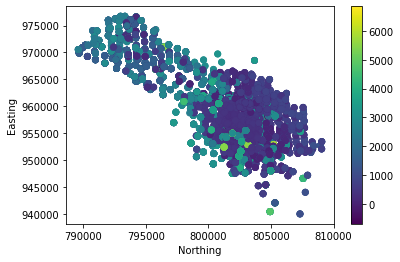

In [158]:
plt.scatter(df_merged.Easting, df_merged.Northing, c = df_merged.iloc[0:, 6])
plt.colorbar()
plt.xlabel("Northing")
plt.ylabel("Easting")

